# Data

In [246]:
from yahoo_fin import options
import numpy as np
import pandas as pd
from yahoo_fin import stock_info as si
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ssn

In [150]:
stock_price = si.get_quote_table("aapl", dict_result = False)["value"][15]
exp_dates = options.get_expiration_dates("AAPL")
calls = options.get_calls("AAPL", exp_dates[1])

In [151]:
k1 = float(calls[abs(calls["Strike"] - np.ceil(stock_price) + 15) == abs(calls["Strike"] - np.ceil(stock_price) + 15).min()]["Strike"])
k2 = float(calls[abs(calls["Strike"] - np.ceil(stock_price)) == abs(calls["Strike"] - np.ceil(stock_price)).min()]["Strike"])
k3 = float(calls[abs(calls["Strike"] - np.ceil(stock_price) - 15) == abs(calls["Strike"] - np.ceil(stock_price) - 15).min()]["Strike"])
k1, k2, k3

(160.0, 175.0, 190.0)

# Bull Spread

**Using Calls:**\
**Buy** a **Call** Option with Strike Price of **K1**\
**Sell** a **Call** Option with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

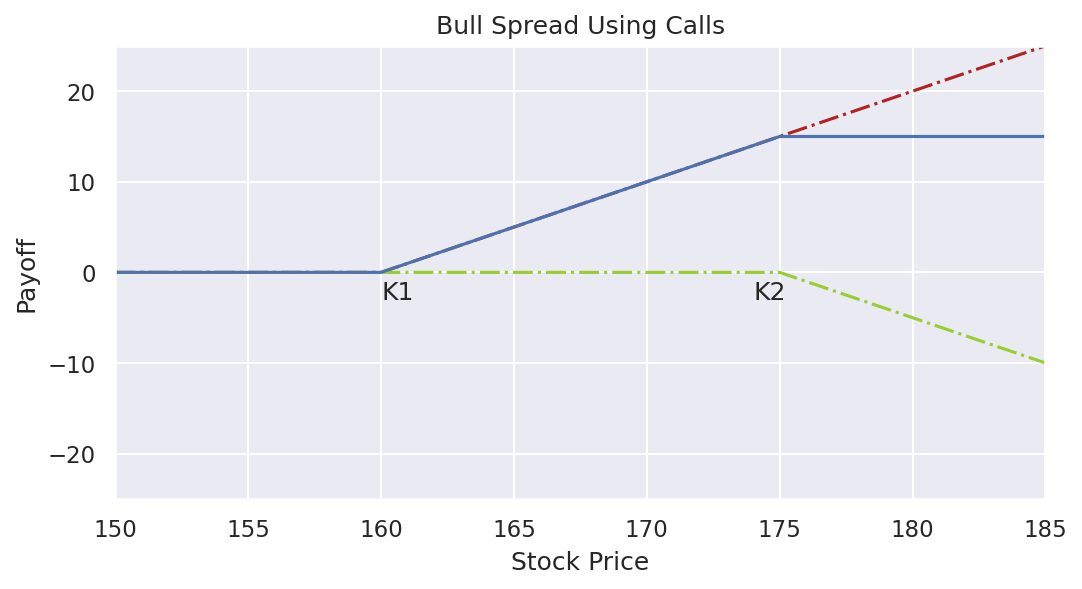

In [285]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k2+10], [0, 0, k2+10-k1], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k2+10], [0, 0, -10], linestyle = "-.", color = "yellowgreen")
fig.annotate("K1", (k1, -3))
fig.annotate("K2", (k2-1, -3))
plt.plot([k1-10, k1, k2, k2+10], [0, 0, k2-k1, k2-k1])
fig.set(ylim = (k1-k2-10, k2-k1+10), xlim = (k1-10, k2+10));
fig.set_title("Bull Spread Using Calls")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

**Using Puts:**\
**Buy** a **Put** Option with Strike Price of **K1**\
**Sell** a **Put** Option with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

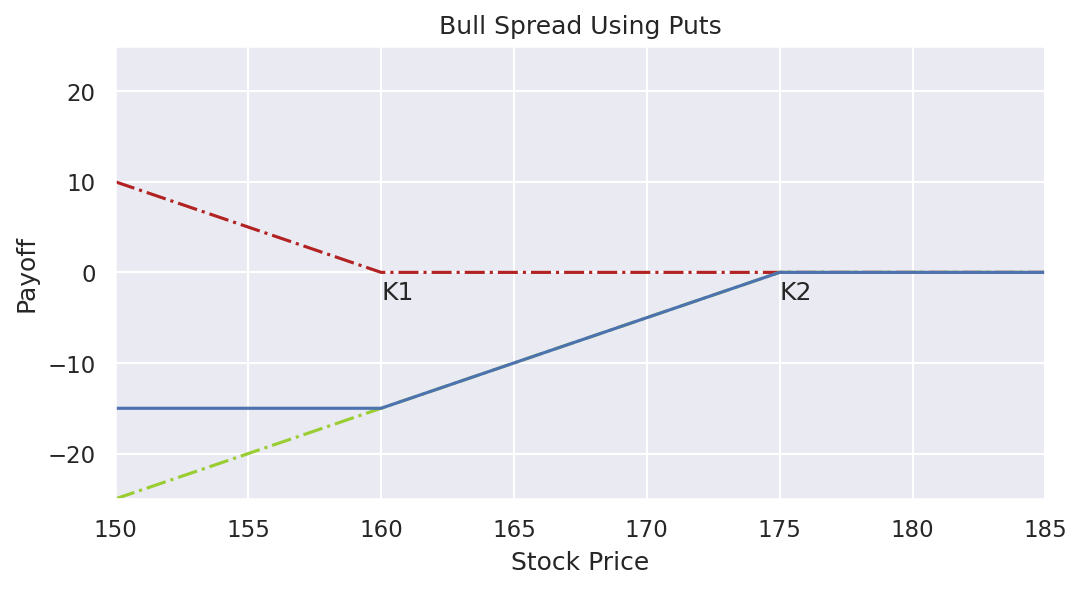

In [286]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k2+10], [10, 0, 0], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k2+10], [-k2+k1-10, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K1", (k1, -3))
fig.annotate("K2", (k2, -3))
plt.plot([k1-10, k1, k2, k2+10], [-k2+k1, -k2+k1, 0, 0])
fig.set(ylim = (k1-k2-10, k2-k1+10), xlim = (k1-10, k2+10));
fig.set_title("Bull Spread Using Puts")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Bear Spread

**Using Calls:**\
**Sell** a **Call** Option with Strike Price of **K1**\
**Buy** a **Call** Option with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

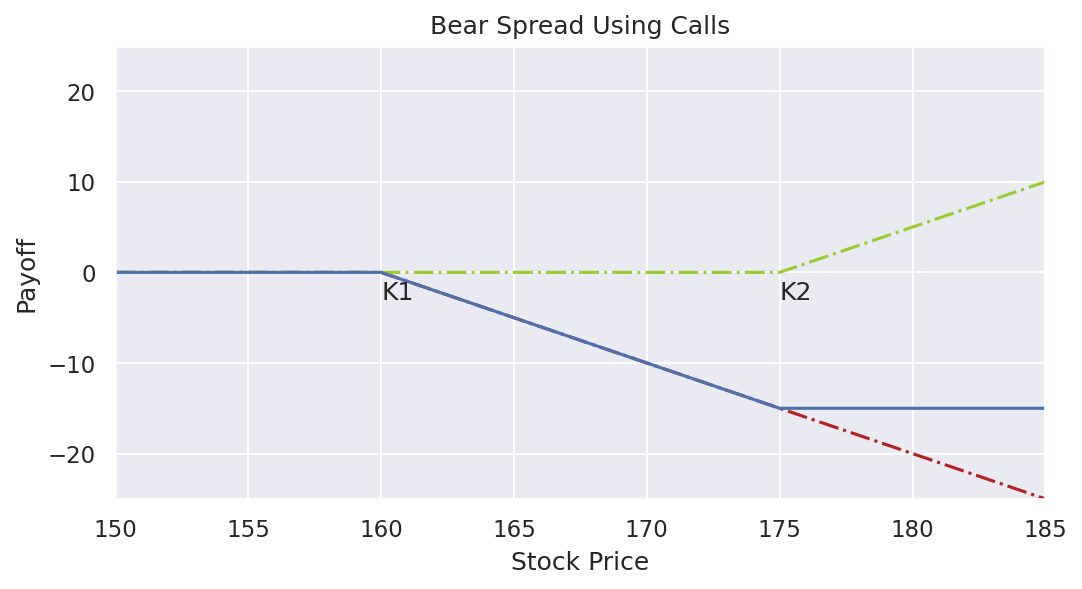

In [287]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k2+10], [0, 0, -k2-10+k1], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k2+10], [0, 0, 10], linestyle = "-.", color = "yellowgreen")
fig.annotate("K1", (k1, -3))
fig.annotate("K2", (k2, -3))
plt.plot([k1-10, k1, k2, k2+10], [0, 0, -k2+k1, -k2+k1])
fig.set(ylim = (k1-k2-10, k2-k1+10), xlim = (k1-10, k2+10));
fig.set_title("Bear Spread Using Calls")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

**Using Puts:**\
**Sell** a **Put** Option with Strike Price of **K1**\
**Buy** a **Put** Option with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

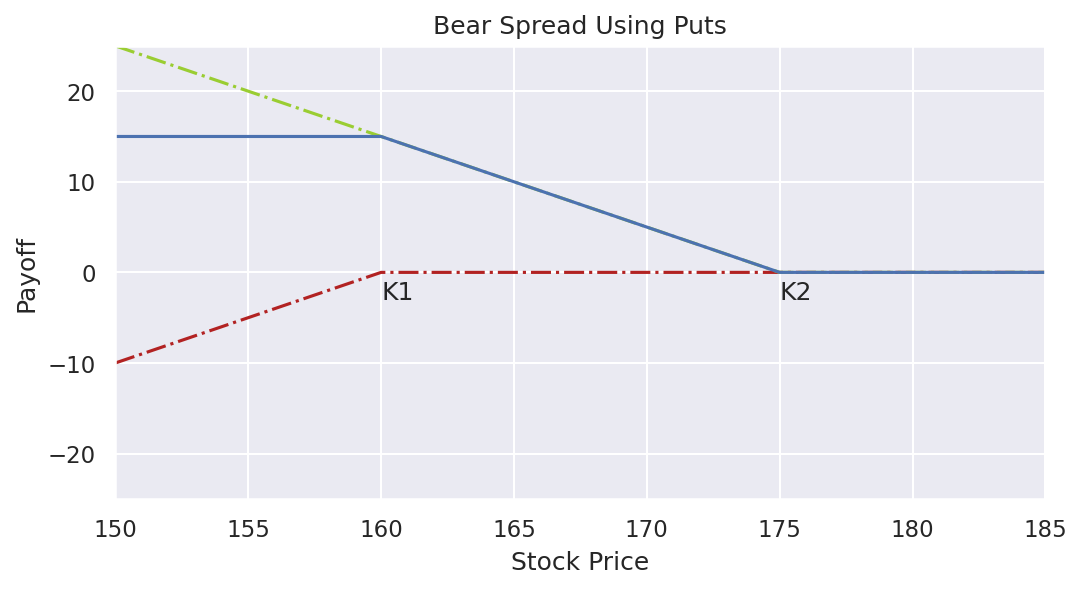

In [288]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k2+10], [-10, 0, 0], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k2+10], [+k2-k1+10, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K1", (k1, -3))
fig.annotate("K2", (k2, -3))
plt.plot([k1-10, k1, k2, k2+10], [k2-k1, k2-k1, 0, 0])
fig.set(ylim = (k1-k2-10, k2-k1+10), xlim = (k1-10, k2+10));
fig.set_title("Bear Spread Using Puts")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Butterfly Spread

**Using Calls:**\
**Buy** **Call** Options with Strike Price of **K1 & K3**\
**Sell** **2 Call** Options with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

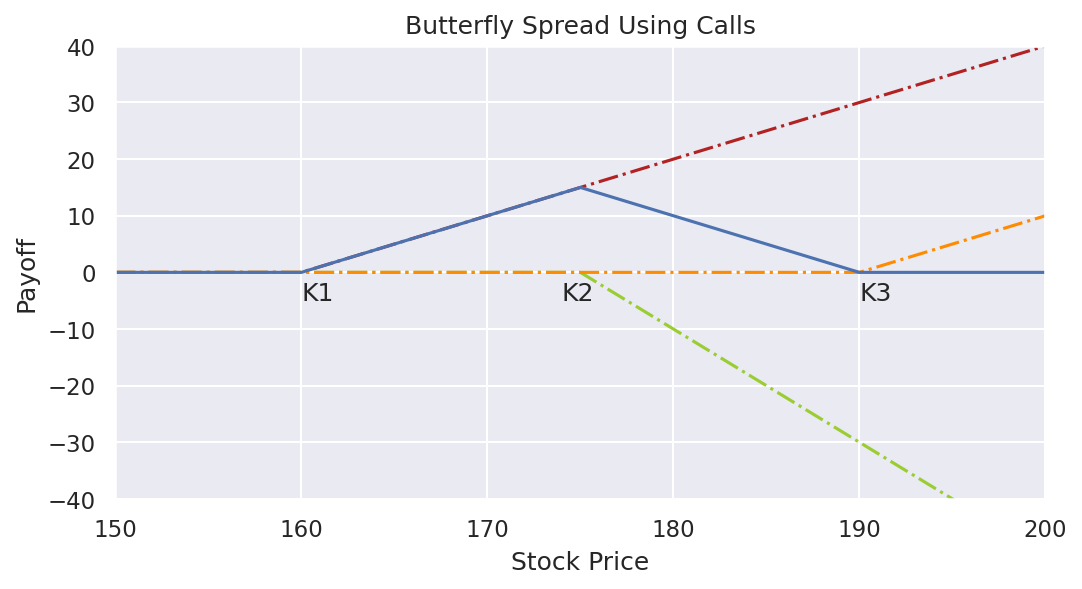

In [289]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k3+10], [0, 0, k3+10-k1], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k3+10], [0, 0, 2*(-k3-10+k2)], linestyle = "-.", color = "yellowgreen")
plt.plot([k1-10, k3, k3+10], [0, 0, 10], linestyle = "-.", color = "darkorange")
fig.annotate("K1", (k1, -5))
fig.annotate("K2", (k2-1, -5))
fig.annotate("K3", (k3, -5))
plt.plot([k1-10, k1, k2, k3, k3+10], [0, 0, k2-k1, 0, 0])
fig.set(ylim = (k1-k3-10, k3-k1+10), xlim = (k1-10, k3+10));
fig.set_title("Butterfly Spread Using Calls")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

**Using Puts:**\
**Buy** **Put** Options with Strike Price of **K1 & K3**\
**Sell** **2 Put** Options with Strike Price of **K2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

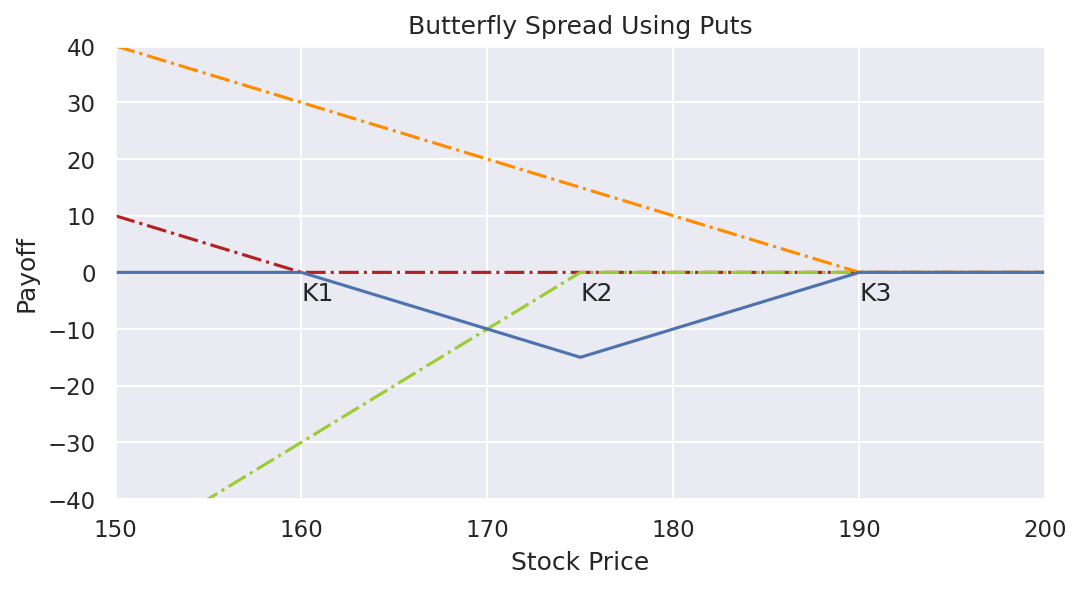

In [290]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k1, k3+10], [10, 0, 0], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k2, k3+10], [2*(-k2+k1-10), 0, 0], linestyle = "-.", color = "yellowgreen")
plt.plot([k1-10, k3, k3+10], [k3-k1+10, 0, 0], linestyle = "-.", color = "darkorange")
fig.annotate("K1", (k1, -5))
fig.annotate("K2", (k2, -5))
fig.annotate("K3", (k3, -5))
plt.plot([k1-10, k1, k2, k3, k3+10], [0, 0, -k3+k2, 0, 0])
fig.set(ylim = (k1-k3-10, k3-k1+10), xlim = (k1-10, k3+10));
fig.set_title("Butterfly Spread Using Puts")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Calendar Spread

**Using Calls:**\
Sell 1 Call with Shorter-Maturity & Buy 1 Call with Loner-Maturity, both with Strike Price of **K**

Apple Historical Volatility (180 Days) = 24.6% \
Source: https://www.alphaquery.com/stock/AAPL/volatility-option-statistics/180-day/historical-volatility \
\
Risk Free Rate (One Year Treasury Rate) = 0.75% \
Source: https://ycharts.com/indicators/1_year_treasury_rate

Using BSM to plot the Longer-Maturity Call Option's Value at T1:

In [245]:
from datetime import datetime, timedelta
a = datetime.strptime(exp_dates[2], "%B %d, %Y")
b = datetime.strptime(exp_dates[3], "%B %d, %Y")
dt = (b-a)/timedelta(days=365)

In [279]:
sigma = 0.246
rf = 0.0075
st = k2-10
bsm = pd.DataFrame(columns=["p", "c"])
while st <k2+10:
  d1 = (np.log(st/k2) + (rf + sigma**2/2) * dt ) / (sigma*np.sqrt(dt))
  d2 = d1 - sigma*dt**0.5
  c =  st*ssn.norm.cdf(d1) - k2*np.exp(-rf*dt)*ssn.norm.cdf(d2)
  bsm = bsm.append({"p":st, "c":c}, ignore_index=True)
  st = st + 0.1
  
c_bsm = []
for i in bsm.index:
  c_bsm.append(bsm["c"][i] - max(bsm["p"][i]-k2, 0))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

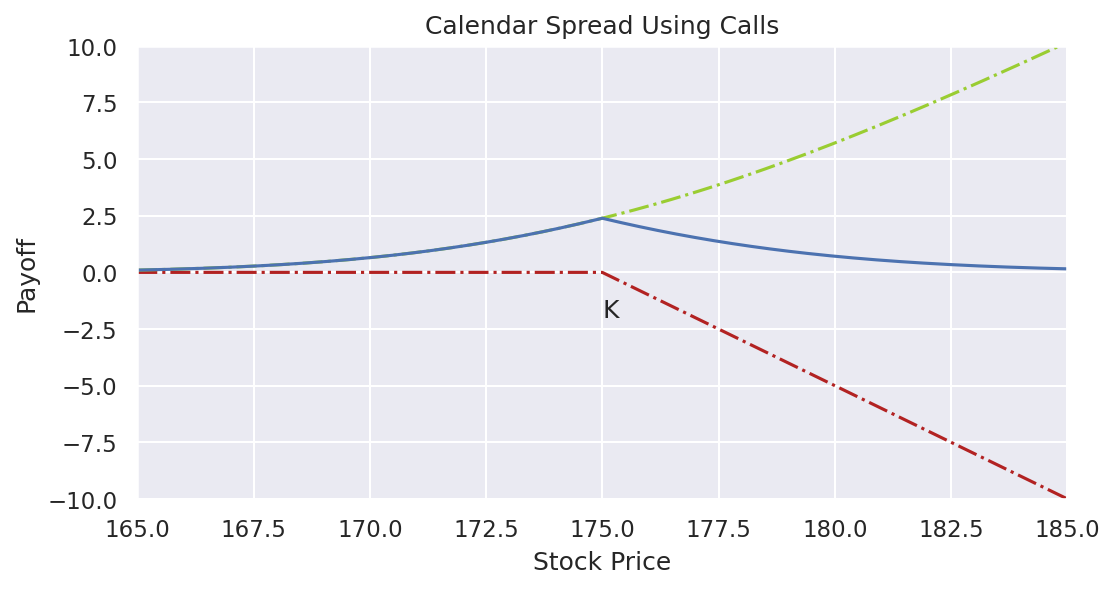

In [291]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k2-10, k2, k2+10], [0, 0, -10], linestyle = "-.", color = "firebrick");
plt.plot(bsm["p"], bsm["c"], linestyle = "-.", color = "yellowgreen");
fig.annotate("K", (k2, -2))
plt.plot(bsm["p"],c_bsm)
fig.set(ylim = (-10, 10), xlim = (k2-10, k2+10));
fig.set_title("Calendar Spread Using Calls")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Straddle

**Buy 1 Call & 1 Put** with Strike Price of **K**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

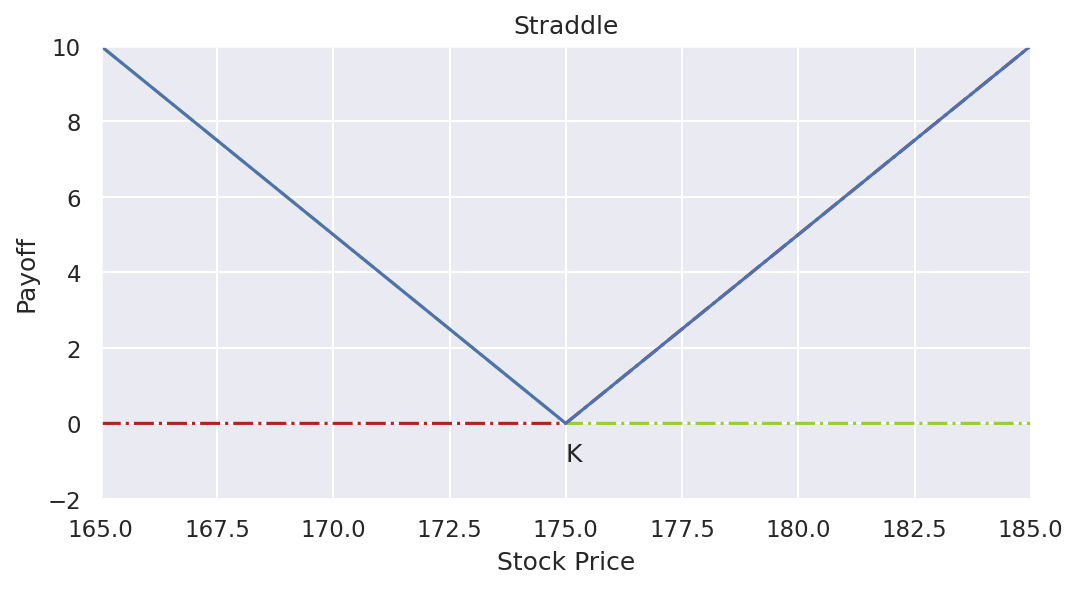

In [292]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k2-10, k2, k2+10], [0, 0, 10], linestyle = "-.", color = "firebrick");
plt.plot([k2-10, k2, k2+10], [10, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K", (k2, -1))
plt.plot([k2-10, k2, k2+10], [10, 0, 10])
fig.set(ylim = (-2, 10), xlim = (k2-10, k2+10));
fig.set_title("Straddle")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Strip

**Buy 1 Call & 2 Puts** with Strike Price of **K**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

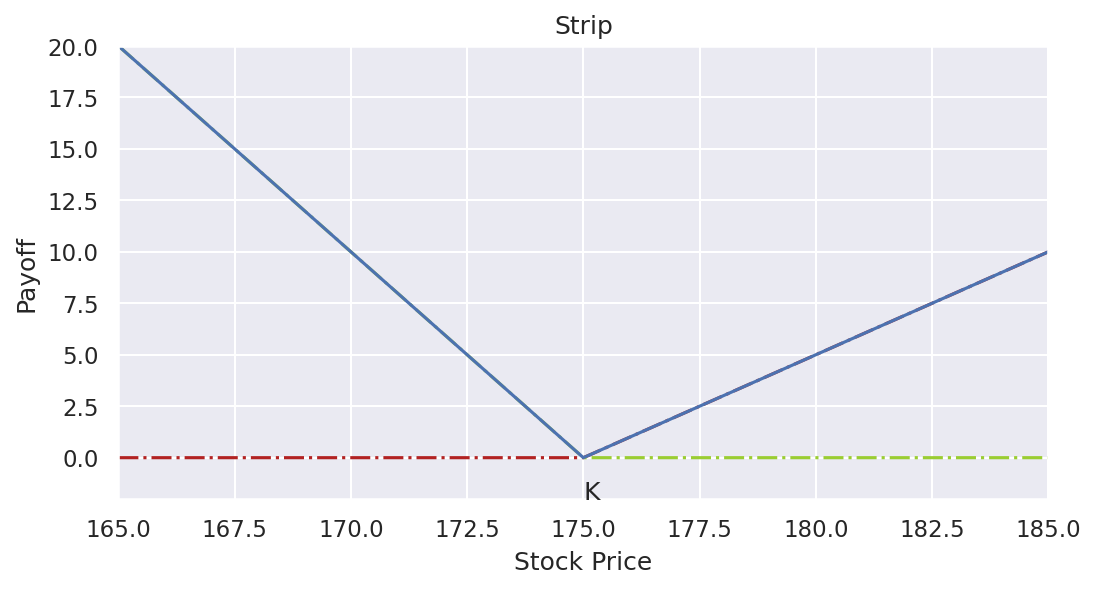

In [293]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k2-10, k2, k2+10], [0, 0, 10], linestyle = "-.", color = "firebrick");
plt.plot([k2-10, k2, k2+10], [20, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K", (k2, -2))
plt.plot([k2-10, k2, k2+10], [20, 0, 10])
fig.set(ylim = (-2, 20), xlim = (k2-10, k2+10));
fig.set_title("Strip")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Strap

**Buy 2 Calls & 1 Put** with Strike Price of **K**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

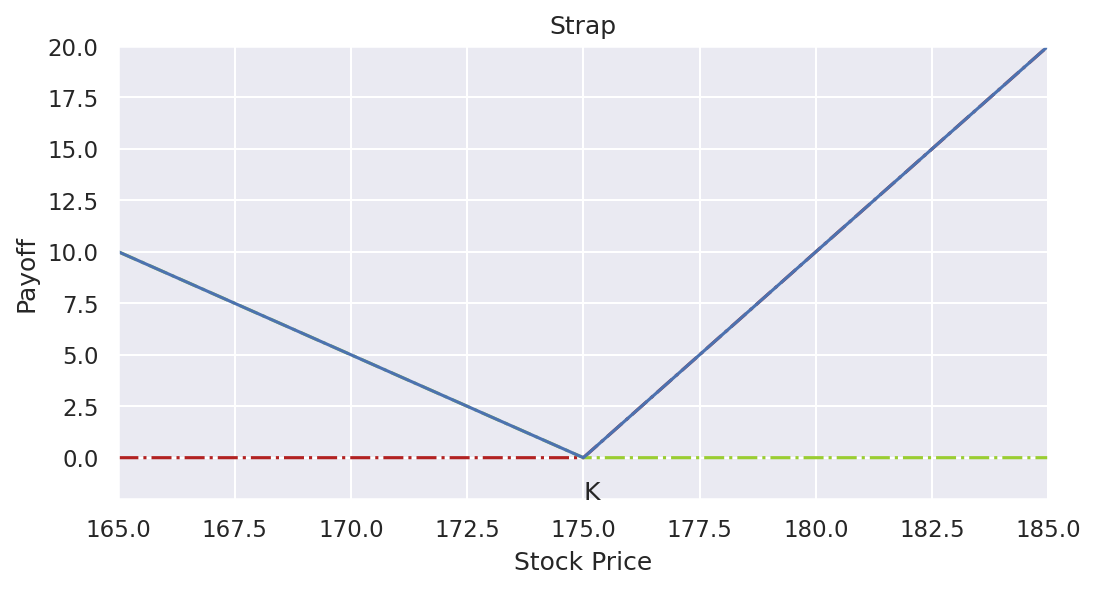

In [294]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k2-10, k2, k2+10], [0, 0, 20], linestyle = "-.", color = "firebrick");
plt.plot([k2-10, k2, k2+10], [10, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K", (k2, -2))
plt.plot([k2-10, k2, k2+10], [10, 0, 20])
fig.set(ylim = (-2, 20), xlim = (k2-10, k2+10));
fig.set_title("Strap")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")

# Strangle

**Buy 1 Put** with Strike Price of **K1** and **1 Call** with Strike Price of **K2** (K2 > K1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Payoff')

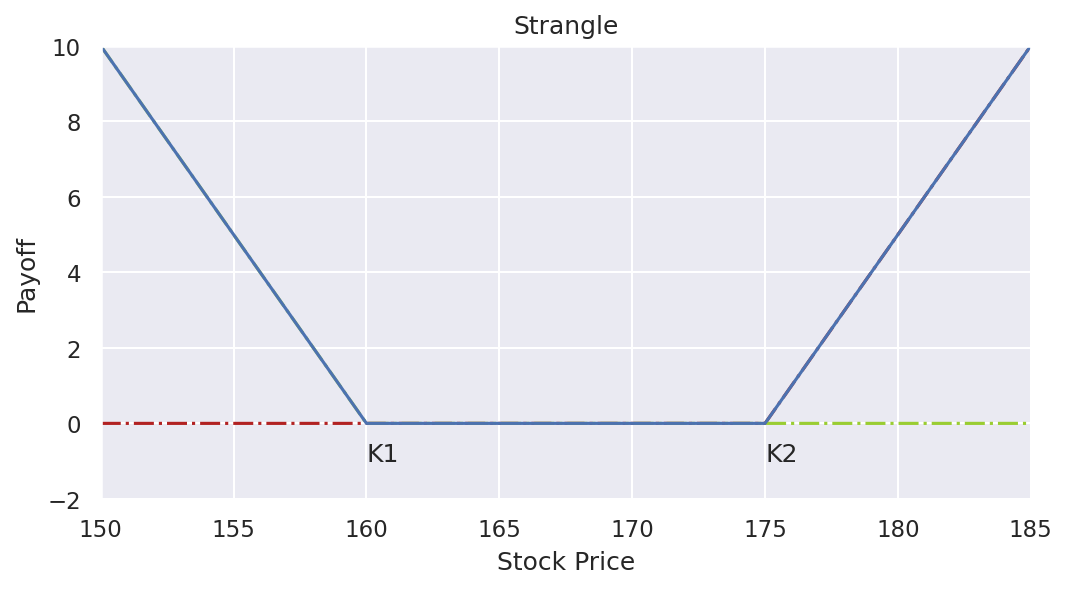

In [295]:
plt.figure(dpi = 150, figsize = (8, 4));
sns.set_theme();
fig = sns.lineplot([k1-10, k2, k2+10], [0, 0, 10], linestyle = "-.", color = "firebrick");
plt.plot([k1-10, k1, k2+10], [10, 0, 0], linestyle = "-.", color = "yellowgreen")
fig.annotate("K1", (k1, -1))
fig.annotate("K2", (k2, -1))
plt.plot([k1-10, k1, k2, k2+10], [10, 0, 0, 10])
fig.set(ylim = (-2, 10), xlim = (k1-10, k2+10));
fig.set_title("Strangle")
fig.set_xlabel("Stock Price")
fig.set_ylabel("Payoff")